In [1]:
from random import random
from typing import Callable

import seaborn as sns
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sampling.distributions import Triangle, Normal
from sampling.samplers import UniformSampler, RejectionSampler, FunctionSampler
from sampling.protocols import Sampler

In [2]:
sns.set()

/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

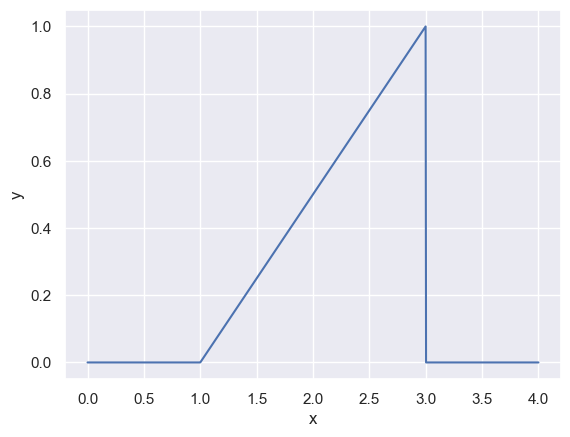

In [3]:
x = np.linspace(0, 4, 1_000)
dist = Triangle(1, 3)
y = [dist.pdf(x_) for x_ in x]

sns.lineplot(data={"x": x, "y": y}, x="x", y="y")
plt.savefig("triangle.png")

/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


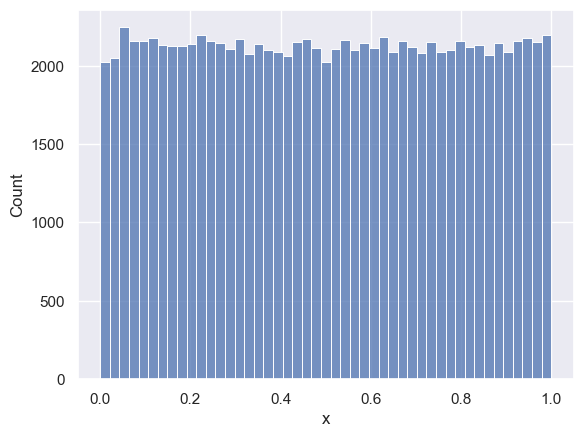

In [4]:
sns.histplot(
    data={"x": [random() for _ in range(100_000)]}, 
    x="x",
)
plt.savefig("uniform1.png")

  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


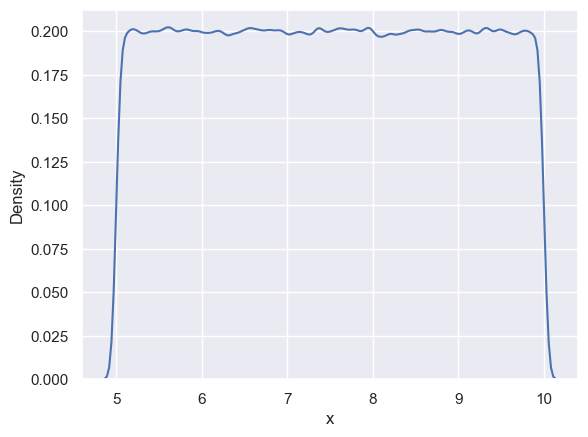

In [5]:
def plot_pdf(sampler: Sampler, n=1_000_000):
    samples = [sampler.draw() for _ in tqdm(range(n))]
    sns.kdeplot(data={"x": samples}, x="x", bw_adjust=0.5)

plot_pdf(UniformSampler(5, 10))
plt.savefig("uniform2.png")

In [6]:
def transform_sampler(sampler: Sampler, f: Callable[[float], float]) -> Sampler:
    return FunctionSampler(func=lambda: f(sampler.draw()))

  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


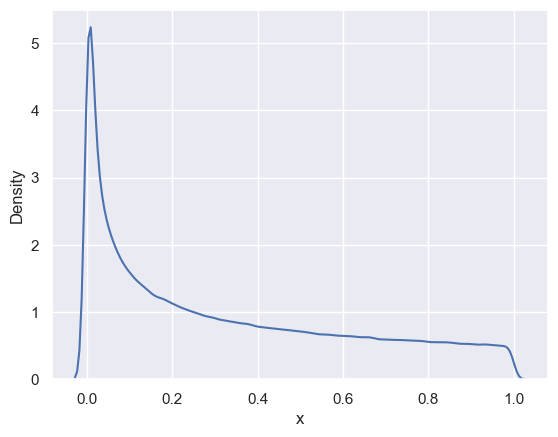

In [7]:
squared_uniform_sampler = transform_sampler(UniformSampler(0, 1), lambda x: x ** 2)
plot_pdf(squared_uniform_sampler)

Let $X$ be distributed uniformly between $l$ and $u$. Then $p(x) = \frac{1}{u - l}$.

We have some unknown distribution $T$. We know the pdf of $T$ is $f$.

We want to know what the pdf of $f(X)$ is.

We know that $p(f(X)=f(x)) = \frac{1}{u - l}$ for $x \in [l, u]$. 

However, we can't get from this to $p(X = x)$ unless we know how to invert $f$. For some special functions we have that, but for a general function defined computationally, we don't.

  0%|          | 0/100000 [00:00<?, ?it/s]

/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


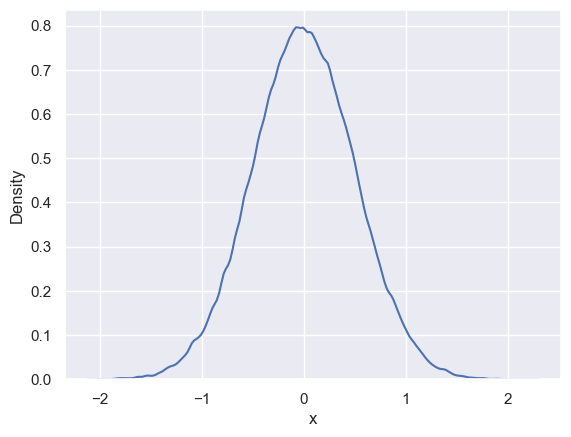

In [8]:
sampler = RejectionSampler(Normal(0, 1), lower=-20, upper=20)
plot_pdf(sampler, n=100_000)
plt.savefig("normal_pdf.png")

In [10]:
sns.reset_orig()
xs = np.linspace(-20, 20, 100)
ys = Normal(0, 1).pdf(xs)
fig = sns.lineplot(data={"xs": xs, "ys": ys}, x="xs", y="ys")
fig.set_facecolor("orange")
plt.fill_between(xs, ys)
plt.savefig("orange_and_blue.png")

/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexmckenzie/miniforge3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us